In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

In [3]:
sales = pd.read_excel('공적마스크판매현황(Feb-Apr).xlsx')

In [4]:
sales.shape

(24, 52)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 8 non-null      object 
 1   Category               20 non-null     object 
 2   2020-02-29 00:00:00    24 non-null     int64  
 3   2020-03-01 00:00:00    23 non-null     float64
 4   2020-03-02 00:00:00    23 non-null     float64
 5   2020-03-03 00:00:00    23 non-null     float64
 6   2020-03-04 00:00:00    23 non-null     float64
 7   2020-03-05 00:00:00    23 non-null     float64
 8   2020-03-06 00:00:00    23 non-null     float64
 9   2020-03-07 00:00:00    23 non-null     float64
 10  2020-03-08 00:00:00    1 non-null      float64
 11  2020-03-09 00:00:00    23 non-null     float64
 12  2020-03-10 00:00:00    23 non-null     float64
 13  2020-03-11 00:00:00    23 non-null     float64
 14  2020-03-12 00:00:00    23 non-null     float64
 15  2020-03-

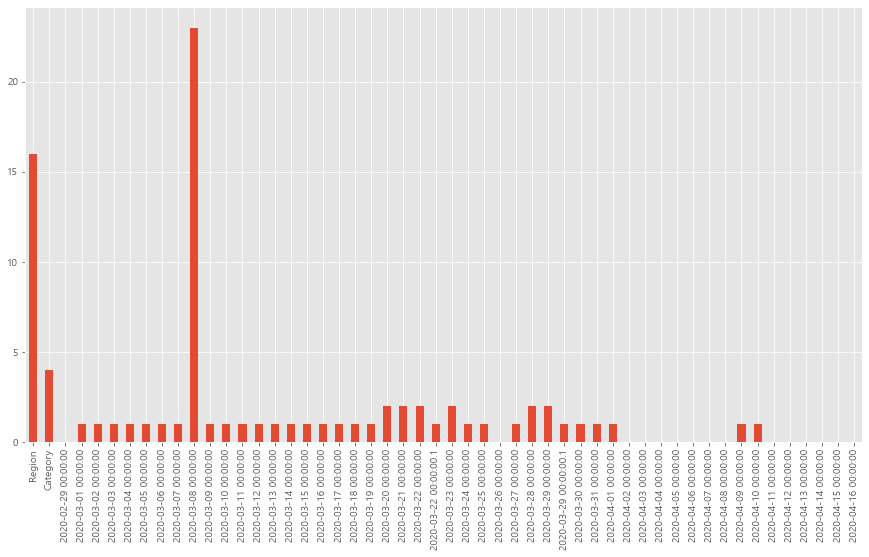

In [6]:
sales.isnull().sum().plot(kind = 'bar', figsize= (15,8))
# 3월 8일은 데이터가 비어있고
# 대부분의 컬럼들이 값이 한두개 비어있음을 확인
# region에서도 빈 값들이 많음. 셀이 합쳐져 있던게 적용이 안된듯
# 카테고리에도 서너개 비어 있음 확인

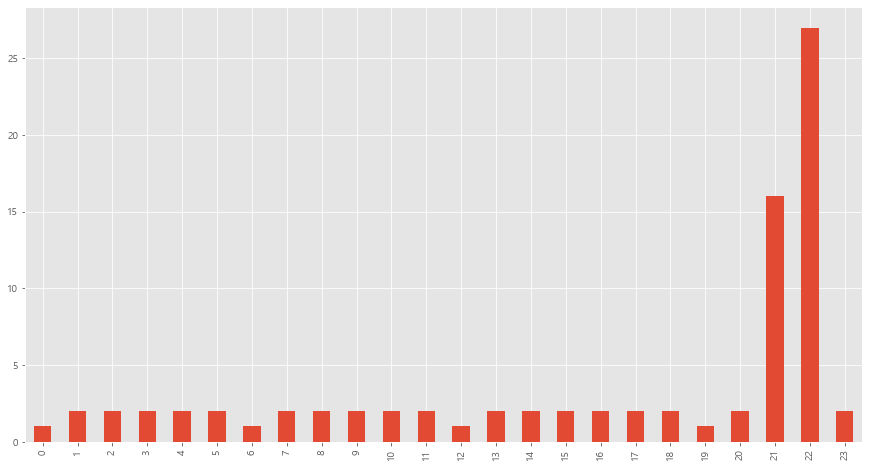

21은 소형마스크공급 행이고 22는 기타 행이다.


In [7]:
sales.T.isnull().sum().plot(kind = 'bar', figsize= (15,8))
plt.show()
print('21은 {0} 행이고 22는 {1} 행이다.'.format(sales.T.loc[:, 21][0], sales.T.loc[:,22][0]))
# 기타 행과 소형마스크 공급 행에 많은 null 값들이 있음

In [8]:
sales.describe()

,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,...,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16
count,24.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1.0,23.000000,...,24.000000,24.000000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,37.333333,17.713043,51.104348,50.086957,47.086957,29.060870,63.130435,40.913043,0.0,61.034783,...,81.066667,78.400000,85.286957,89.086957,66.075000,19.191667,84.866667,82.416667,80.958333,73.700000
std,98.726969,47.127644,121.659205,118.558886,113.564064,69.408742,161.816384,110.354933,NaN,157.194138,...,215.867038,209.121487,220.368665,227.743846,175.632166,53.944077,220.758772,219.260232,224.696113,191.914401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,18.000000,20.200000,6.000000,6.000000,3.400000,0.000000,0.0,0.400000,...,0.950000,0.950000,1.000000,1.500000,0.000000,0.000000,0.750000,0.300000,0.000000,0.000000
75%,21.500000,7.000000,35.700000,44.000000,42.500000,27.000000,35.800000,1.900000,0.0,32.650000,...,19.100000,19.625000,28.250000,40.400000,20.125000,0.450000,53.800000,26.825000,7.550000,48.425000
max,448.000000,203.700000,587.700000,576.000000,541.500000,334.200000,726.000000,470.500000,0.0,701.900000,...,972.800000,940.800000,980.800000,1024.500000,792.900000,230.300000,1018.400000,989.000000,971.500000,884.400000


## 전처리 작업

### 컬럼명부터 바꾸어 보았다

In [9]:
col_name = list(sales.iloc[:, 2:].columns)

col_list = ['Region', 'Category']

for col in col_name:
    if type(col) == datetime.datetime:
        col_list.append(col.strftime('%m%d'))
    else:
        col_list.append(col[5:10].replace('-','')) # datetime 형식이 아닌 str 형식이 있어서..

In [10]:
sales.columns = col_list

In [11]:
# 0308이 앞에서 삭제해서 비어있고 0322와 0329가 중복되어 있는 것을 확인

In [12]:
sales.columns = ['Region', 'Category', '0229', '0301', '0302', '0303', '0304', '0305',
       '0306', '0307', '0308', '0309', '0310', '0311', '0312', '0313', '0314',
       '0315', '0316', '0317', '0318', '0319', '0320', '0321', '0322', '제거1',
       '0323', '0324', '0325', '0326', '0327', '0328', '제거2', '0329', '0330',
       '0331', '0401', '0402', '0403', '0404', '0405', '0406', '0407', '0408',
       '0409', '0410', '0411', '0412', '0413', '0414', '0415', '0416']

In [13]:
sales.drop(['제거1', '제거2'], axis = 1 , inplace = True)

In [14]:
##  지역에서 공통부분 nan으로 처리된거 고쳐줌
sales.iloc[1:6, 0] = '대구경북'
sales.iloc[7:12, 0] = '서울경기인천'
sales.iloc[13:19, 0] = '그밖의지역'

In [15]:
sales.loc[22] # 기타 행의 상태를 보자

Region         기타
Category      NaN
0229            0
0301          NaN
0302          NaN
0303          NaN
0304          NaN
0305          NaN
0306          NaN
0307          NaN
0308          NaN
0309          NaN
0310          NaN
0311          NaN
0312          NaN
0313          NaN
0314          NaN
0315          NaN
0316          NaN
0317          NaN
0318          NaN
0319          NaN
0320          NaN
0321          NaN
0322          NaN
0323          NaN
0324         38.9
0325        142.9
0326           96
0327         28.3
0328          NaN
0329        172.8
0330           80
0331         12.1
0401        137.2
0402         14.3
0403         43.9
0404            0
0405            0
0406            0
0407         14.5
0408         22.7
0409         27.6
0410        171.4
0411            0
0412            0
0413           53
0414            0
0415            0
0416        144.3
Name: 22, dtype: object

In [16]:
# 2월29일~ 3월23일까지는 다 null. 평균값으로 하기에는 너무 빈값이 많아서 0으로 대체
sales.loc[22] = sales.loc[22].fillna(0)

In [17]:
sales.drop('0308', axis = 1 , inplace = True) # 값이 비어있는 3월 8일자 삭제

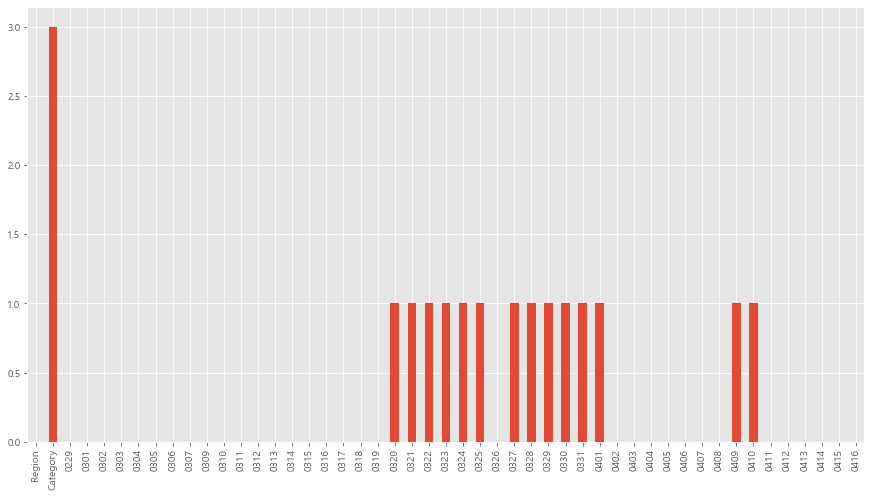

In [18]:
sales.isnull().sum().plot(kind = 'bar', figsize= (15,8))

In [19]:
sales['Category'] = sales['Category'].fillna('없음')
sales.loc[22,'Category'] = '없음'

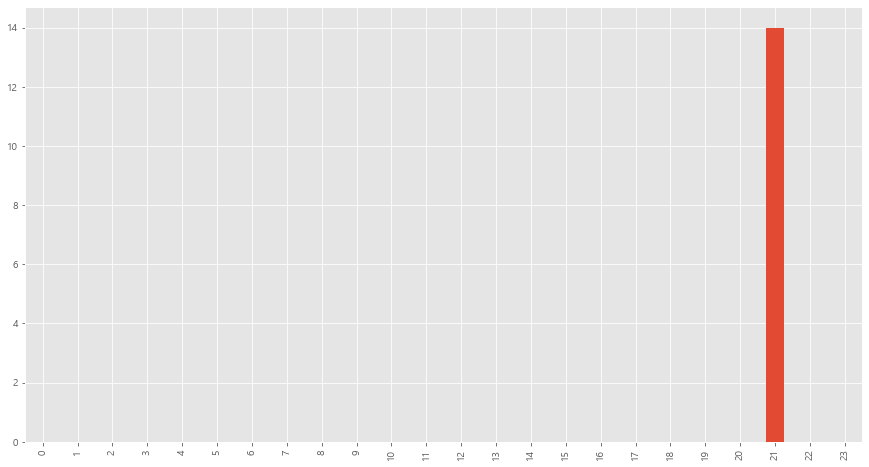

In [20]:
sales.T.isnull().sum().plot(kind = 'bar', figsize= (15,8))
# 소형마스크공급 행에 있는 null값만 처리해주면 된다

In [21]:
sales.loc[21] = sales.loc[21].fillna(0) # 빈값수가 많고 대부분이 0이므로 0으로 채워줌

In [22]:
sales.isnull().sum() # null값 처리 끝

Region      0
Category    0
0229        0
0301        0
0302        0
0303        0
0304        0
0305        0
0306        0
0307        0
0309        0
0310        0
0311        0
0312        0
0313        0
0314        0
0315        0
0316        0
0317        0
0318        0
0319        0
0320        0
0321        0
0322        0
0323        0
0324        0
0325        0
0326        0
0327        0
0328        0
0329        0
0330        0
0331        0
0401        0
0402        0
0403        0
0404        0
0405        0
0406        0
0407        0
0408        0
0409        0
0410        0
0411        0
0412        0
0413        0
0414        0
0415        0
0416        0
dtype: int64

In [23]:
sales['Category'].value_counts()

없음           4
의료기관         3
우체국          3
하나로마트        3
약국           3
공영홈쇼핑        2
행복한백화점       1
명품마루(서울역)    1
특별공급         1
명품마루(대전역)    1
아임쇼핑         1
명품마루(광주역)    1
Name: Category, dtype: int64

In [24]:
# 명품마루(지역)으로 되어 있는 것을 나눠줌
sales.loc[10, 'Category'] = '명품마루'
sales.loc[16, 'Category'] = '명품마루'
sales.loc[17, 'Category'] = '명품마루'
sales.loc[16, 'Region'] = '대전'
sales.loc[17, 'Region'] = '광주'

sales.loc[20, 'Category'] = '의료기관'
sales.loc[21, 'Category'] = '소형마스크공급'
sales.loc[22, 'Category'] = '기타'
sales.loc[23, 'Category'] = '합계'

In [25]:
# # 분석 편의를 위해 뒤집어주었다
# sales = sales.T

In [26]:
# # 컬럼명을 지역명 + 카테고리로 설정
# sales.columns = sales.loc['Region'] + '/' + sales.loc['Category']


In [27]:
# sales['대구경북/약국']

In [28]:
sales

,Region,Category,0229,0301,0302,0303,0304,0305,0306,0307,...,0407,0408,0409,0410,0411,0412,0413,0414,0415,0416
0,대구경북,특별공급,102,0.0,69.0,71.5,70.0,0.0,32.0,0.0,...,32.9,18.6,28.9,22.8,40.0,0.0,78.1,33.2,0.0,46.9
1,대구경북,약국,30,3.9,24.9,25.0,3.6,20.0,59.0,47.4,...,60.2,59.7,59.0,58.0,54.3,13.9,56.2,61.7,69.4,53.0
2,대구경북,우체국,0,0.0,21.0,23.0,23.0,23.0,4.6,0.0,...,2.9,2.7,2.4,2.4,2.9,1.2,2.4,2.1,0.0,0.0
3,대구경북,하나로마트,21,0.0,21.0,21.0,21.0,21.0,3.4,3.4,...,2.3,2.5,2.3,2.2,0.0,0.0,2.2,5.6,5.4,0.0
4,대구경북,공영홈쇼핑,1,2.0,2.0,1.8,1.3,1.4,4.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,대구경북,의료기관,0,0.0,30.0,86.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,서울경기인천,약국,208,31.4,117.2,47.0,107.7,72.2,279.0,223.4,...,402.2,391.6,390.2,380.6,346.0,125.9,387.5,440.3,476.0,341.1
7,서울경기인천,우체국,0,0.0,5.6,6.0,6.0,6.0,1.2,0.0,...,1.6,1.6,1.0,1.5,0.3,0.2,1.2,1.1,0.0,1.0
8,서울경기인천,하나로마트,0,112.0,16.0,16.0,45.7,15.8,0.3,0.4,...,0.3,0.3,0.3,0.2,0.0,0.0,0.3,0.6,0.8,0.0
9,서울경기인천,행복한백화점,10,10.0,5.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 실제 확진자수와 판매량의 관계를 보기 위해
### 공공데이터 포털 openapi 이용하여 지역별 확진자수 구해왔다

In [29]:
import requests
from bs4 import BeautifulSoup as bs

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='
servicekey = 'hxTimG9XZ4vz3x88ws4AP6GhkNHJYQBaYsbywF29wFRW8pZzOD1BMaFVUKBDFimDzqSQ2U%2FUns500cWdo%2BO4EA%3D%3D'
condition = '&pageNo=2&numOfRows=100&startCreateDt=20200229&endCreateDt=20200416'
open_api = url+servicekey+condition

res = requests.get(open_api)
html = res.content
soup = bs(html, 'html.parser')
soup

items = soup.find_all('item')

seoul = dict()
incheon = dict()
kyungi = dict()

daegu = dict()


for item in items:
    
    if item.select_one('gubun').text == '경기':
        if item.select_one('defcnt'):
            kyungi[item.select_one('stdday').text] = item.select_one('incdec').text
        else:
            pass
            
    elif item.select_one('gubun').text == '서울':
        if item.select_one('defcnt'):
            seoul[item.select_one('stdday').text] = item.select_one('incdec').text

        
    elif item.select_one('gubun').text == '인천':
        if item.select_one('defcnt'):
            incheon[item.select_one('stdday').text] = item.select_one('incdec').text
        
    elif item.select_one('gubun').text == '대구':
        if item.select_one('defcnt'):
            daegu[item.select_one('stdday').text] = item.select_one('incdec').text
        
    else:
        pass

In [30]:
inc = pd.DataFrame(data = incheon, index= [0])
seo = pd.DataFrame(data = seoul , index = [0])
kyu = pd.DataFrame(data = kyungi, index= [0])
dae = pd.DataFrame(data = daegu , index = [0])

In [31]:
df_all = pd.concat([inc,seo,kyu,dae])

In [32]:
df_all.index = ['인천', '서울', '경기', '대구']

In [33]:
# 컬럼 순서 재설정
col_list = []
a = list(df_all.columns)
for i in range(len(a)):
    col_list.append(a.pop())

In [34]:
df_all = df_all.reindex(columns = col_list)

In [35]:
df_all

,2020년 3월 4일 00시,2020년 3월 5일 00시,2020년 3월 6일 00시,2020년 3월 7일 00시,2020년 3월 8일 00시,2020년 3월 9일 00시,2020년 3월 10일 00시,2020년 3월 11일 00시,2020년 3월 12일 00시,2020년 3월 13일 00시,...,2020년 04월 07일 00시,2020년 04월 08일 00시,2020년 4월 08일 00시,2020년 04월 10일 00시,2020년 04월 11일 00시,2020년 4월 12일 00시,2020년 04월 13일 00시,2020년 04월 14일 00시,2020년 04월 15일 00시,2020년 04월 16일 00시
인천,2,0,0,0,0,0,4,12,0,2,...,0,4,0,1,0,1,1,1,0,0
서울,1,4,2,3,12,10,11,52,19,13,...,4,11,12,5,4,3,8,2,5,2
경기,7,9,10,10,11,11,11,12,3,7,...,10,6,10,9,9,4,3,8,6,4
대구,405,321,367,390,297,190,92,131,73,61,...,13,9,4,0,7,2,3,3,1,4


In [36]:
df_all = df_all.apply(pd.to_numeric)

In [37]:
def short(x):
    name = x.split()[1] + x.split()[2]
    if name[0] == '0':
        name = name.lstrip('0')
    return name
cols=list(df_all.columns)
for i in range(len(cols)):
    cols[i] = short(cols[i])
df_all.columns = cols

In [38]:
df_all.columns = ['3월4일', '3월5일', '3월6일', '3월7일', '3월8일', '3월9일', '3월10일', '3월11일',
       '3월12일', '3월13일', '3월14일', '3월15일', '3월16일', '3월17일', '3월18일', '3월19일',
       '3월20일', '3월21일', '3월22일', '3월23일', '3월24일', '3월25일', '3월26일', '3월27일',
       '3월28일', '3월29일', '3월30일', '3월31일', '4월01일', '4월02일', '4월03일', '4월04일',
       '4월05일', '4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일',
       '4월13일', '4월14일', '4월15일', '4월16일']

In [39]:
sales_union = sales[sales['Region'] == '서울경기인천']

In [40]:
sales_union.index = sales[sales['Region'] == '서울경기인천']['Category']

In [41]:
sales_union.drop(['Region', 'Category'], axis =1 , inplace = True)
sales_union.drop(['0229','0301','0302','0303'], axis = 1, inplace = True)

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
sales_union['0308'] = sales_union.mean().mean()

<ipython-input-42-7da1a60e4bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_union['0308'] = sales_union.mean().mean()


In [43]:
sales_union = sales_union[['0304', '0305', '0306', '0307', 
       '0308', '0309', '0310', '0311', '0312', '0313',
       '0314', '0315', '0316', '0317', '0318', '0319', '0320', '0321', '0322',
       '0323', '0324', '0325', '0326', '0327', '0328', '0329',
       '0330', '0331', '0401', '0402', '0403', '0404', '0405', '0406', '0407',
       '0408', '0409', '0410', '0411', '0412', '0413', '0414', '0415', '0416']]

In [44]:
df_all.columns = sales_union.columns

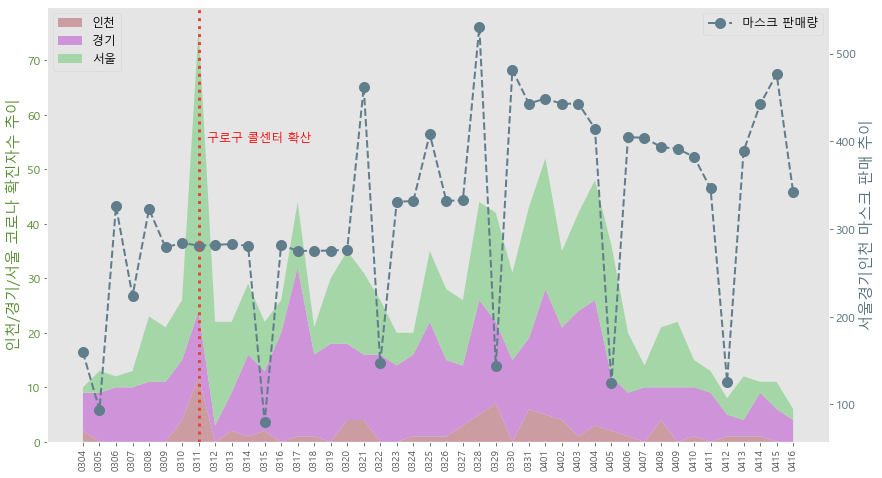

In [45]:
fig,ax = plt.subplots(figsize = (14,8))

x = df_all.columns
y = [list(df_all.loc['인천'].values), list(df_all.loc['경기'].values), list(df_all.loc['서울'].values)]

colormap = ['#cb9ca1','#ce93d8','#a5d6a7']

ax.stackplot(x,y, labels = ['인천', '경기', '서울'], colors = colormap)
plt.legend(loc = 'upper left', fontsize = 12)
plt.ylabel('인천/경기/서울 코로나 확진자수 추이', fontsize = 15, color = '#558b2f')
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 90)
plt.yticks(fontsize = 12, color = '#558b2f')

plt.grid(None)

ax2 = ax.twinx()
ax2.plot(sales_union.sum().values, label = '마스크 판매량', linewidth = 2,ls = '--', color = '#607d8b', marker = 'o', markersize= 10)

plt.ylabel('서울경기인천 마스크 판매 추이', fontsize = 15, color = '#546e7a')
plt.legend(loc = 'upper right', fontsize = 12)
plt.yticks(fontsize = 12, color = '#546e7a')
plt.grid(None)
plt.axvline(x = 7, linewidth = 3, ls = ':')
plt.text(7.5, 400, '구로구 콜센터 확산', fontsize =12 , color = 'red')
plt.show()

### 3월 15일/3월 22일/3월 29일/4월 5일/4월 12일의 경우 갑자기 마스크 공급량이 떨어짐을 확인 가능
#### 확인해본 결과 전부 일요일에 해당

In [46]:
sales_union[['0315','0322','0329','0405','0412']]

,0315,0322,0329,0405,0412
Category,,,,,
약국,80.0,146.9,143.2,123.9,125.9
우체국,0.0,0.0,0.0,0.0,0.2
하나로마트,0.0,0.2,0.2,0.3,0.0
행복한백화점,0.0,0.0,0.0,0.0,0.0
명품마루,0.0,0.0,0.0,0.0,0.0
의료기관,0.0,0.0,0.0,0.0,0.0


In [47]:
sunday = sales_union[['0315','0322','0329','0405','0412']].sum().mean()
other_days = sales_union.drop(['0315','0322','0329','0405','0412'], axis = 1).sum().mean()
print('일요일 판매량 평균이 {0}임에 비해 일요일을 제외한 날들의 판매량 평균은 {1}로 판매량이 약 {2:.1f}% 감소함을 확인'.format(sunday, other_days, (other_days - sunday)/other_days*100))

일요일 판매량 평균이 124.16임에 비해 일요일을 제외한 날들의 판매량 평균은 348.0777579010137로 판매량이 약 64.3% 감소함을 확인


### 일요일에는 판매량이 64% 감소한다 

### 다음으로는 마찬가지 방법으로 대구의 코로나 확진자수 추이와 마스크 판매량을 비교해봄

In [48]:
sales_daegu = sales[sales['Region'] == '대구경북']
sales_daegu.index = sales[sales['Region'] == '대구경북']['Category']

sales_daegu.drop(['Region', 'Category'], axis =1 , inplace = True)
sales_daegu.drop(['0229','0301','0302','0303'], axis = 1, inplace = True)

C:\Users\msi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
sales_daegu['0308'] = sales_daegu.mean().mean()
sales_daegu = sales_union[['0304', '0305', '0306', '0307', 
       '0308', '0309', '0310', '0311', '0312', '0313',
       '0314', '0315', '0316', '0317', '0318', '0319', '0320', '0321', '0322',
       '0323', '0324', '0325', '0326', '0327', '0328', '0329',
       '0330', '0331', '0401', '0402', '0403', '0404', '0405', '0406', '0407',
       '0408', '0409', '0410', '0411', '0412', '0413', '0414', '0415', '0416']]

<ipython-input-49-a193119e033e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_daegu['0308'] = sales_daegu.mean().mean()


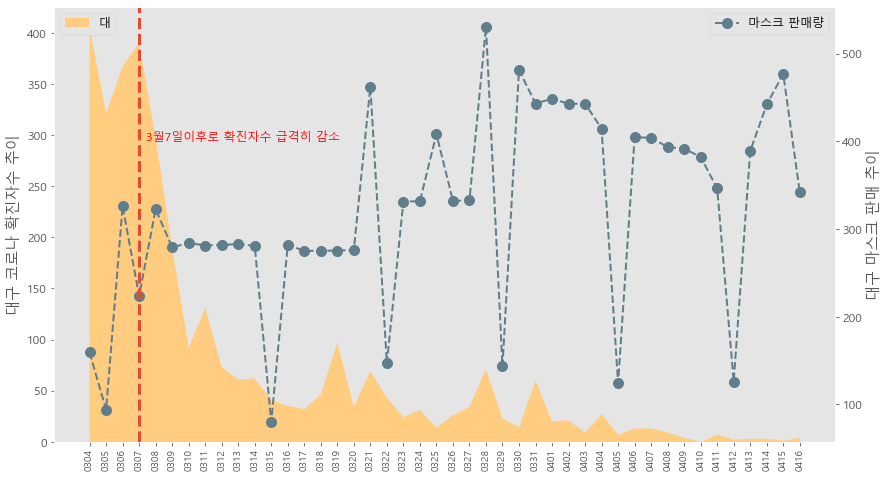

In [50]:
fig, ax = plt.subplots(figsize = (14,8))

x = df_all.columns
y = [list(df_all.loc['대구'].values)]
ax.stackplot(x,y, labels = '대구', colors = '#ffcc80')
plt.legend(loc = 'upper left', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation = 90)
plt.ylabel('대구 코로나 확진자수 추이', fontsize = 15)
plt.yticks(fontsize = 12)
plt.grid(None)

ax2 = ax.twinx()
ax2.plot(sales_daegu.sum(), linewidth = 2,ls = '--', color = '#607d8b', marker = 'o', markersize= 10, label = '마스크 판매량')
plt.ylabel('대구 마스크 판매 추이', fontsize = 15)
plt.legend(loc = 'upper right', fontsize = 12)
plt.yticks(fontsize = 12)

plt.axvline(x = 3, linewidth = 3, ls = '--')
plt.text(3.4,400, '3월7일이후로 확진자수 급격히 감소', fontsize = 12, color = 'red')
plt.grid(None)

plt.show()

![title](확진자_9.png)

### 참고 : 대구는 2월18일 발병한 이후로 3월15일까지 급격히 상승하다가 점차 완만해짐을 확인
#### 출처 : 질병관리청

## 중국과 세계 수입/수출 현황 분석

In [51]:
china = pd.read_excel('마스크-중국수출수입.xlsx')

In [52]:
china

,품목별 국가별 수출입실적,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"통계기준:수리일,조회구분:201901 ~202003 ,품목명:기타,국가:[중국]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"단위:천 불(USD 1,000) / Kg"
3,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,무역수지
4,총계,NaN,NaN,NaN,"3,464,773","34,064,422","200,396","296,002","-95,606"
5,2019.01,기타,6307909000,중국,"35,843","2,667,232",815,"15,796","-14,982"
6,2019.02,기타,6307909000,중국,"26,500","1,140,536",642,"7,408","-6,766"
7,2019.03,기타,6307909000,중국,"39,893","1,875,946",884,"12,371","-11,486"
8,2019.04,기타,6307909000,중국,"51,831","2,438,899",650,"14,967","-14,318"
9,2019.05,기타,6307909000,중국,"23,968","2,138,528",932,"13,174","-12,243"


In [53]:
china.columns = china.loc[3]
china.rename(columns = {'무역수지' : '무역수지(단위:천 불(USD 1,000)/ kg)'}, inplace = True)
china.drop([0,1,2,3], inplace = True)
china.index = range(len(china))
china

3,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,"무역수지(단위:천 불(USD 1,000)/ kg)"
0,총계,NaN,NaN,NaN,"3,464,773","34,064,422","200,396","296,002","-95,606"
1,2019.01,기타,6307909000,중국,"35,843","2,667,232",815,"15,796","-14,982"
2,2019.02,기타,6307909000,중국,"26,500","1,140,536",642,"7,408","-6,766"
3,2019.03,기타,6307909000,중국,"39,893","1,875,946",884,"12,371","-11,486"
4,2019.04,기타,6307909000,중국,"51,831","2,438,899",650,"14,967","-14,318"
5,2019.05,기타,6307909000,중국,"23,968","2,138,528",932,"13,174","-12,243"
6,2019.06,기타,6307909000,중국,"22,582","2,328,388",334,"14,058","-13,724"
7,2019.07,기타,6307909000,중국,"39,773","3,011,883",345,"15,486","-15,140"
8,2019.08,기타,6307909000,중국,"33,820","2,171,351",503,"14,226","-13,723"
9,2019.09,기타,6307909000,중국,"19,947","2,047,596",377,"13,214","-12,837"


In [54]:
china = china.append(china.loc[0])
china.index = range(len(china))
china.drop(0, inplace = True)
china.index = range(len(china))

In [55]:
china.loc[15,'품목명'] = '기타'
china.loc[15,'품목코드'] = china.loc[0,'품목코드']
china.loc[15,'국가명'] = '중국'
china

3,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,"무역수지(단위:천 불(USD 1,000)/ kg)"
0,2019.01,기타,6307909000,중국,"35,843","2,667,232",815,"15,796","-14,982"
1,2019.02,기타,6307909000,중국,"26,500","1,140,536",642,"7,408","-6,766"
2,2019.03,기타,6307909000,중국,"39,893","1,875,946",884,"12,371","-11,486"
3,2019.04,기타,6307909000,중국,"51,831","2,438,899",650,"14,967","-14,318"
4,2019.05,기타,6307909000,중국,"23,968","2,138,528",932,"13,174","-12,243"
5,2019.06,기타,6307909000,중국,"22,582","2,328,388",334,"14,058","-13,724"
6,2019.07,기타,6307909000,중국,"39,773","3,011,883",345,"15,486","-15,140"
7,2019.08,기타,6307909000,중국,"33,820","2,171,351",503,"14,226","-13,723"
8,2019.09,기타,6307909000,중국,"19,947","2,047,596",377,"13,214","-12,837"
9,2019.10,기타,6307909000,중국,"20,738","2,392,929",510,"15,097","-14,586"


In [56]:
# 기존에 str으로 되어있던 수치 값들을 int로 바꿔주었다

def strtoint(x):
    if ',' in x:
        x = x.replace(',', '')
    return int(x)

china['수출중량'] = china['수출중량'].apply(strtoint)
china['수입중량'] = china['수입중량'].apply(strtoint)
china['수출금액'] = china['수출금액'].apply(strtoint)
china['수입금액'] = china['수입금액'].apply(strtoint)
china['무역수지(단위:천 불(USD 1,000)/ kg)'] = china['무역수지(단위:천 불(USD 1,000)/ kg)'].apply(strtoint)
china

3,기간,품목명,품목코드,국가명,수출중량,수입중량,수출금액,수입금액,"무역수지(단위:천 불(USD 1,000)/ kg)"
0,2019.01,기타,6307909000,중국,35843,2667232,815,15796,-14982
1,2019.02,기타,6307909000,중국,26500,1140536,642,7408,-6766
2,2019.03,기타,6307909000,중국,39893,1875946,884,12371,-11486
3,2019.04,기타,6307909000,중국,51831,2438899,650,14967,-14318
4,2019.05,기타,6307909000,중국,23968,2138528,932,13174,-12243
5,2019.06,기타,6307909000,중국,22582,2328388,334,14058,-13724
6,2019.07,기타,6307909000,중국,39773,3011883,345,15486,-15140
7,2019.08,기타,6307909000,중국,33820,2171351,503,14226,-13723
8,2019.09,기타,6307909000,중국,19947,2047596,377,13214,-12837
9,2019.10,기타,6307909000,중국,20738,2392929,510,15097,-14586


In [57]:
# 중복되어 필요없는 컬럼 삭제
china.drop(['품목명', '품목코드', '국가명'], axis = 1 ,inplace = True)

In [58]:
china['수출kg당가격'] = china['수출금액'] / china['수출중량']
china['수입kg당가격'] = china['수입금액'] / china['수입중량']

In [59]:
china['기간'][0].replace('20', '')

'19.01'

In [60]:
def china_plot(col_name, ylabel):
    df = china.loc[0:14] # 총계 행 삭제
    data = df[col_name]
    
    fig, ax = plt.subplots(figsize = (12,6))
    
    ax.plot(data, color = 'blue', marker = 'o')
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['기간'].apply(lambda x : x[2:]), fontsize = 12) # 앞의 20 제거

    ax.axvline(x = 11.9, linestyle = '--', color = '#00796b', alpha = 0.5)
    ax.axvline(x = 13.7, color = 'red', alpha = 0.15, linewidth = 85)
    ax.axvline(x = 12.7, linestyle = '--', color = 'red', linewidth = 3)
    ax.text(11.8, 57000, '19년12월31일 \n 중국 집단 폐렴 환자 발생 발표', ha = 'right', fontsize = 10, color = '#00796b')
    ax.set_xlabel('월단위')
    ax.set_ylabel(ylabel)
    ax.set_title('월별 ' + col_name, fontsize = 20)
    plt.annotate('1월 20일 국내 첫 발병', xy = (13.3, 110000),color = 'red', xytext = (4,100000), fontsize = 18, arrowprops = dict(facecolor = 'black', color = 'red', width = 2, shrink = 0.1, headwidth = 10))
plt.show()

In [61]:
china.columns

Index(['기간', '수출중량', '수입중량', '수출금액', '수입금액', '무역수지(단위:천 불(USD 1,000)/ kg)',
       '수출kg당가격', '수입kg당가격'],
      dtype='object', name=3)

#### 19년 12월 31일 중국에서 처음으로 환자 공표 
#### 그 후 약 한 달 정도 지난 1월 20일 인천 공항에서 국내 첫 중국인 환자 발생
### 마스크 사재기, 공급 부족 등으로 수급에 문제가 생기자 공적 마스크 제도가 3월 5일 시행되었는데
### 초기에 사태 파악을 제대로 못하고 1월,2월에 해외로 수출한 양이 많았던 것이 문제로 보임
### 뒤늦게 3월달에는 수출량이 떨어진 것을 확인

<ipython-input-60-c5efbf490f05>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('1월 20일 국내 첫 발병', xy = (13.3, 110000),color = 'red', xytext = (4,100000), fontsize = 18, arrowprops = dict(facecolor = 'black', color = 'red', width = 2, shrink = 0.1, headwidth = 10))


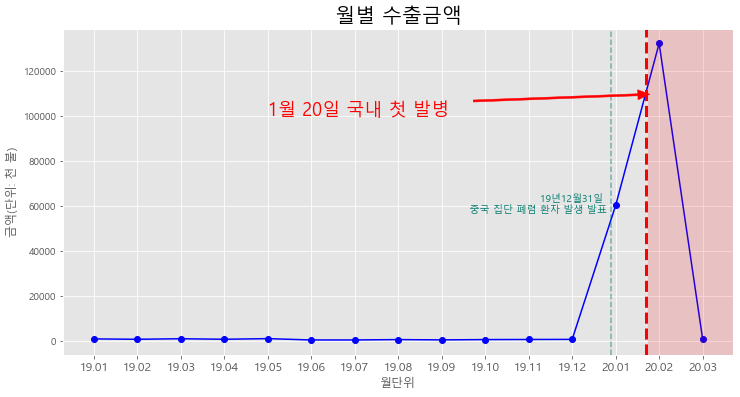

In [62]:
china_plot('수출금액', '금액(단위: 천 불)')

### 1월은 19년도와 별반 차이 없는 수입금액을 보이지만
### 2월은 오히려 더 떨어졌다가 3월에 2월 수출량만큼 물량 확보

<ipython-input-60-c5efbf490f05>:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('1월 20일 국내 첫 발병', xy = (13.3, 110000),color = 'red', xytext = (4,100000), fontsize = 18, arrowprops = dict(facecolor = 'black', color = 'red', width = 2, shrink = 0.1, headwidth = 10))


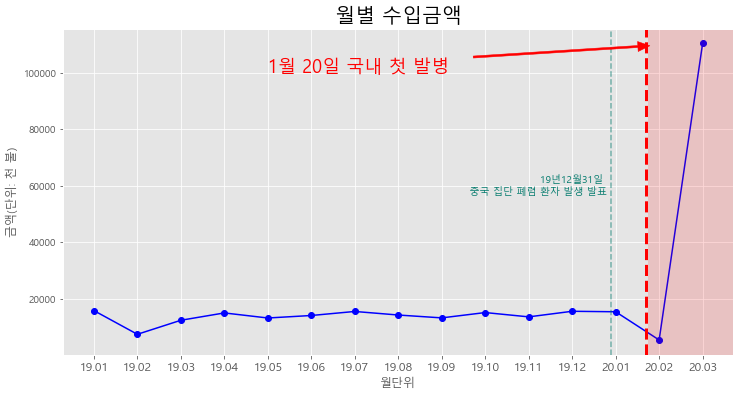

In [63]:
china_plot('수입금액', '금액(단위: 천 불)')

In [64]:
china['기간'][:-1].values

array(['2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03'], dtype=object)

#### 코로나 터지기 이전에는 우리나라가 중국에 수출하는 비용이 더 적었지만
#### 20년 1월부터 중국에 수출하는 양이 급격히 상승했다.
#### 2월달에 오히려 수입양이 줄어든 것으로 보아 중국에서는 물량확보에 좀더 빠르게 대처한 것 같고
#### 우리나라는 2월까지만해도 대량의 마스크를 수출하고 3월에서야 이를 통제하고 수입함을 확인
### 아쉬운 대처

<ipython-input-65-329d71d74eaa>:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('마스크 물량 확보 실패', fontsize = 15,color = '#fb8c00', xy = (11,20000), xytext = (7,40000), arrowprops = dict(facecolor = 'black', color = '#fb8c00', width = 2, shrink = 0.1, headwidth = 10))


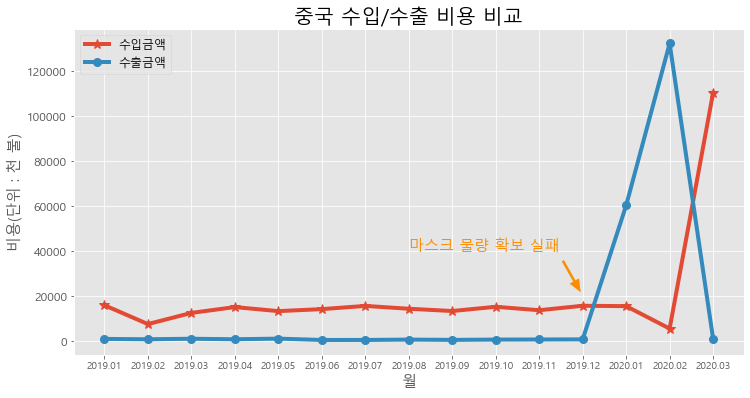

In [65]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(china['수입금액'][:-1], marker = '*', lw = 4, markersize = 10, label = '수입금액')
ax.plot(china['수출금액'][:-1], marker = 'o', lw = 4, markersize = 8, label = '수출금액')
ax.set_xticks(range(len(china['기간'][:-1])))
ax.set_xticklabels(list(china['기간'][:-1]))
ax.set_yticks([0,20000,40000,60000,80000,100000,120000])
ax.set_yticklabels([0,20000,40000,60000,80000,100000,120000], fontsize = 12)
ax.set_xlabel('월', fontsize = 15)
ax.set_ylabel('비용(단위 : 천 불)', fontsize = 15)
plt.legend(fontsize = 12)
plt.annotate('마스크 물량 확보 실패', fontsize = 15,color = '#fb8c00', xy = (11,20000), xytext = (7,40000), arrowprops = dict(facecolor = 'black', color = '#fb8c00', width = 2, shrink = 0.1, headwidth = 10))
plt.title('중국 수입/수출 비용 비교', fontsize  = 20)
plt.show()

## 그렇다면 진짜로 대처가 늦은건지 중국 이외의 세계 다른 나라들로부터 수입양을 분석해보자

In [66]:
world = pd.read_excel('마스크수출입-전세계.xlsx')

In [67]:
world.columns = world.loc[3]
world.rename(columns = {'무역수지' : '무역수지(단위:천 불(USD 1,000)/ kg)'}, inplace = True)
world.drop([0,1,2,3], inplace = True)

In [68]:
world.loc[282] = world.loc[4]
world.drop(4, inplace = True)
world.index = range(len(world))

In [69]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   기간                           278 non-null    object
 1   품목명                          277 non-null    object
 2   품목코드                         277 non-null    object
 3   국가명                          277 non-null    object
 4   수출중량                         278 non-null    object
 5   수입중량                         278 non-null    object
 6   수출금액                         278 non-null    object
 7   수입금액                         278 non-null    object
 8   무역수지(단위:천 불(USD 1,000)/ kg)  278 non-null    object
dtypes: object(9)
memory usage: 19.7+ KB


In [70]:
# 앞서 이용한 strtoint 함수를 이용해 기존에 str으로 되어있던 수치 값들을 int로 바꿔주었다

world['수출중량'] = world['수출중량'].apply(strtoint)
world['수입중량'] = world['수입중량'].apply(strtoint)
world['수출금액'] = world['수출금액'].apply(strtoint)
world['수입금액'] = world['수입금액'].apply(strtoint)
world['무역수지(단위:천 불(USD 1,000)/ kg)'] = world['무역수지(단위:천 불(USD 1,000)/ kg)'].apply(strtoint)

In [71]:
# 필요없는 두 컬럼 삭제 
world.drop(['품목명', '품목코드'], axis= 1 , inplace = True)

In [72]:
world.drop(277, inplace = True)

In [73]:
print('총 277개 행 중에서\n')

print('unique한 국가 개수는 {0}개이다'.format(len(world['국가명'].unique())))
print('\n1월 데이터 : {0}개\n2월 데이터 : {1}개\n3월 데이터 : {2}개'.format(world['기간'].value_counts()[2], world['기간'].value_counts()[1],world['기간'].value_counts()[0]))

총 277개 행 중에서

unique한 국가 개수는 128개이다

1월 데이터 : 77개
2월 데이터 : 86개
3월 데이터 : 114개


In [74]:
country_count = world.groupby('국가명', as_index = False)['기간'].count().sort_values(by = '기간', ascending = False)
country_count['기간'].value_counts()

print('3개월분 데이터 있는 국가 : {0}개\n2개월분 데이터 있는 국가 : {1}개\n1개월분 데이터 있는 국가 : {2}개'.format(country_count['기간'].value_counts()[3],country_count['기간'].value_counts()[2],country_count['기간'].value_counts()[1]))

3개월분 데이터 있는 국가 : 66개
2개월분 데이터 있는 국가 : 17개
1개월분 데이터 있는 국가 : 45개


### 아래 그래프에서 y축이 1e6 이렇게 단위가 바껴서 나오는데..검색해서 나온 해결책을 해봐도 안고쳐지네요..

###  19년 이전부터 수입량이 수출량보다 많았던 항목이지만 
### 20년 2월들어 앞서 중국만 보았을때와 마찬가지로 수입량이 수출량이 따라잡힘

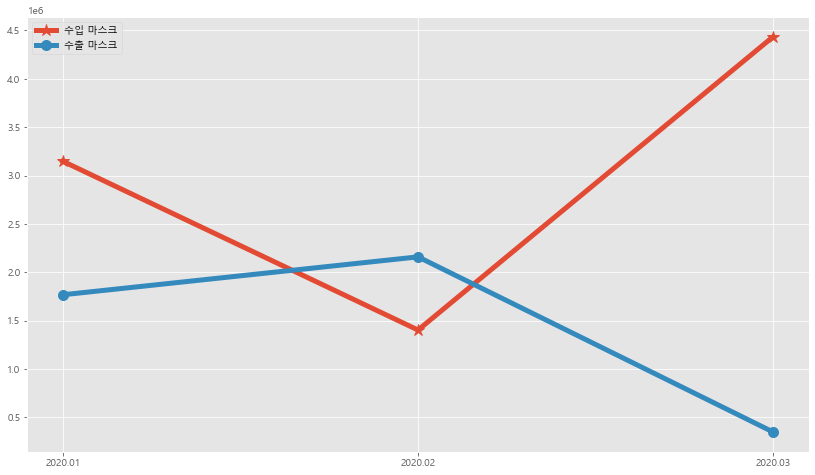

In [75]:
inmask = world.groupby(['기간'])['수입중량'].sum()
outmask = world.groupby(['기간'])['수출중량'].sum()

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(inmask, lw = 5, label = '수입 마스크', marker = '*', markersize =12)
ax.plot(outmask, lw = 5, label = '수출 마스크', marker = 'o', markersize =10)

plt.legend()
plt.show()

In [76]:
world_sum = world.groupby(['국가명'],as_index = False)['수입중량'].sum().sort_values(by = '수입중량', ascending = False)
world_sum['수입중량'] = world_sum['수입중량'].apply(pd.to_numeric)
world_sum['비율'] = world_sum['수입중량']/world_sum.sum()['수입중량']*100

In [77]:
world_sum[:10]

3,국가명,수입중량,비율
92,중국,7210008,80.249398
43,베트남,1228636,13.675061
38,미얀마,123150,1.370694
36,미국,92354,1.027926
90,일본,57937,0.644855
57,스리랑카,52564,0.585052
63,싱가포르,38250,0.425733
13,대만,33660,0.374645
89,인도네시아,22830,0.254104
109,태국,22298,0.248183


### 1월,2월,3월 동안 중국에서 수입량이 81.4%로 압도적으로 1등이고
### 베트남이 13.8%로 2등
### 의외로 미얀마가 1.39%로 3등 그 이외의 국가들은 1%미만이었다

In [78]:
world1 = world[world['기간'] == '2020.01']
world1['비율'] = world1['수입중량']/world1.sum()['수입중량']*100
world1.sort_values(by = '수입중량', ascending = False)[:10]

world2 = world[world['기간'] == '2020.02']
world2['비율'] = world2['수입중량']/world2.sum()['수입중량']*100
world2.sort_values(by = '수입중량', ascending = False)[:10]

world3 = world[world['기간'] == '2020.03']
world3['비율'] = world3['수입중량']/world3.sum()['수입중량']*100
world3.sort_values(by = '수입중량', ascending = False)[:10]

world1

<ipython-input-78-c47ec66c469a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world1['비율'] = world1['수입중량']/world1.sum()['수입중량']*100
<ipython-input-78-c47ec66c469a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world2['비율'] = world2['수입중량']/world2.sum()['수입중량']*100
<ipython-input-78-c47ec66c469a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

3,기간,국가명,수출중량,수입중량,수출금액,수입금액,"무역수지(단위:천 불(USD 1,000)/ kg)",비율
0,2020.01,루마니아,1336,226,10,20,-10,0.007182
1,2020.01,세르비아,1019,0,0,0,0,0.000000
2,2020.01,러시아 연방,6019,0,103,0,103,0.000000
3,2020.01,사우디아라비아,176,30,20,4,17,0.000953
4,2020.01,스웨덴,0,92,0,20,-20,0.002924
...,...,...,...,...,...,...,...,...
72,2020.01,페루,5,29,0,5,-5,0.000922
73,2020.01,필리핀,3244,851,145,94,51,0.027044
74,2020.01,포루투갈,186,4,7,0,6,0.000127
75,2020.01,팔라우,8,0,0,0,0,0.000000


### '월별 수입량 상위 5국가'

<BarContainer object of 5 artists>

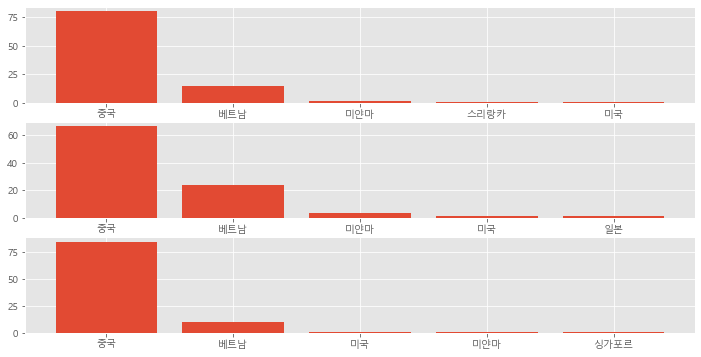

In [79]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize = (12,6), nrows=3)
data1 = world1.sort_values(by = '수입중량', ascending = False)[:5]
data2 = world2.sort_values(by = '수입중량', ascending = False)[:5]
data3 = world3.sort_values(by = '수입중량', ascending = False)[:5]

ax1.bar(data1['국가명'], data1['비율'])

ax2.bar(data2['국가명'], data2['비율'])

ax3.bar(data3['국가명'], data3['비율'])



#### 1월,2월, 3월 모두 중국이 85% 이상으로 대부분을 차지
#### 1,2,3등은 중국/베트남/미얀마 순으로 고정
#### 코로나가 터지면서 급격히 많은 양을 생산하기에는 공장, 인력이 부족한듯
#### 이러한 긴급한 판데믹 사태에 대비한 물량 공급 라인이 필요했었는데 그런 대책이 부족했던거 같다